This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** June 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FIXED-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and defining the numerical solver parameters and the different parametric problem items (external magnets, initial plasma domain, initial guess and plasma current model), the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

In [1]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-MEDIUM-ITFW'
#MESH = 'TRI03-INTERMEDIATE-ITFW'
#MESH = 'TRI03-FINE-ITFW'
#MESH = 'TRI03-SUPERFINE-ITFW'
#MESH = 'TRI03-MEGAFINE-ITFW'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI06-MEDIUM-ITFW'
#MESH = 'TRI06-INTERMEDIATE-ITFW'
#MESH = 'TRI06-FINE-ITFW'
MESH = 'TRI06-SUPERFINE-ITFW'
#MESH = 'TRI06-MEGAFINE-ITFW'

###### CUBIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI10-SUPERFINE-ITFW'


###### LINEAR QUADRILATERAL ELEMENT MESH
#MESH = 'QUA04-MEDIUM-ITFW'
#MESH = 'QUA04-INTERMEDIATE-ITFW'
#MESH = 'QUA04-FINE-ITFW'
#MESH = 'QUA04-SUPERFINE-ITFW'
#MESH = 'QUA04-MEGAFINE-ITFW'

###### QUADRATIC QUADRILATERAL ELEMENT MESH
#MESH = 'QUA09-MEDIUM-ITFW'
#MESH = 'QUA09-INTERMEDIATE-ITFW'
#MESH = 'QUA09-FINE-ITFW'
#MESH = 'QUA09-SUPERFINE-ITFW'
#MESH = 'QUA09-MEGAFINE-ITFW'


# RECTANGULAR MESH
#MESH = 'TRI03-FINE-RECTANGLE'
#MESH = 'TRI06-MEDIUM-RECTANGLE'

#MESH = 'TRI10-MEGAFINE-LINEAR'

Authorization required, but no authorization protocol specified

Authorization required, but no authorization protocol specified



In [2]:
##CREATE GRAD-SHAFRANOV PROBLEM WITH CHOSEN MESH
Problem = GradShafranovSolver(MESH)

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY
READ MESH FILES...
     -> READ MESH DATA FILES...Done!
     -> READ FIX DATA FILE...Done!
Done!


In [3]:
## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Problem.FIXED_BOUNDARY = False
Problem.GhostStabilization = True
Problem.PARALLEL = False

##### OUTPUT PLOTS IN RUNTIME
Problem.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Problem.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Problem.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Problem.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Problem.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Problem.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Problem.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Problem.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Problem.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Problem.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

In [4]:
# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Problem.QuadratureOrder2D = 5   # ORDER OF NUMERICAL INTEGRATION QUADRATURES                    
Problem.EXT_ITER = 5            # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Problem.EXT_TOL = 1.0e-3        # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Problem.INT_ITER = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Problem.INT_TOL = 1.0e-4        # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Problem.PLASMA_IT = 0           # ITERATION AFTER WHICH THE PLASMA REGION CAN BE UPDATED
Problem.beta = 1.0e4            # NITSCHE'S METHOD PENALTY PARAMETER
Problem.zeta = 1.0e-2           # GHOST PENALTY PARAMETER
Problem.PSIrelax = False
Problem.lambda0 = 0.3           # INITIAL AIKITEN'S RELAXATION PARAMETER (alpha0 = 1 - lambda0)
Problem.PHIrelax = False
Problem.alphaPHI = 0.5
Problem.EXTR_R0 = 6.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Problem.EXTR_Z0 = 1.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Problem.SADD_R0 = 5.0           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Problem.SADD_Z0 = -3.5          # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Problem.OPTI_ITMAX = 50         # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Problem.OPTI_TOL = 1.0e-6       # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

In [5]:
##### DEFINE TOKAMAK EXTERNAL MAGNETS
# COILS
coil1 = Coil(index = 1,
             dim = Problem.dim,
             X = np.array([3.9431,7.5741]),
             I = 5.73e6)
coil2 = Coil(index = 2,
             dim = Problem.dim,
             X = np.array([8.2851,6.5398]),
             I = -2.88e6)
coil3 = Coil(index = 3,
             dim = Problem.dim,
             X = np.array([11.9919,3.2752]),
             I = -5.81e6)
coil4 = Coil(index = 4,
             dim = Problem.dim,
             X = np.array([11.9630,-2.2336]),
             I = -4.78e6)
coil5 = Coil(index = 5,
             dim = Problem.dim,
             X = np.array([ 8.3908,-6.7269]),
             I = -7.81e6)
coil6 = Coil(index = 6,
             dim = Problem.dim,
             X = np.array([4.3340, -7.4665]),
             I = 16.94e6)
Problem.COILS = [coil1, coil2, coil3, coil4, coil5, coil6]
   
# SOLENOIDS
solenoid1 = Solenoid(index = 1,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, -5.415],
                                    [1.696, -3.6067]]),
                     I = 5.3e6,
                     Nturns = 1)
solenoid2 = Solenoid(index = 2,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, -3.6067],
                                    [1.696, -1.7983]]),
                     I = -10.3e6,
                     Nturns = 1)
solenoid3 = Solenoid(index = 3,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, -1.7983],
                                    [1.696, 0.0]]),
                     I = -20.8e6,
                     Nturns = 1)
solenoid4 = Solenoid(index = 4,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, 0.0],
                                    [1.696, 1.8183]]),
                     I = -20.8e6,
                     Nturns = 1)
solenoid5 = Solenoid(index = 5,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, 1.8183],
                                    [1.696, 3.6267]]),
                     I = -4.05e6,
                     Nturns = 1)
solenoid6 = Solenoid(index = 6,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, 3.6267],
                                    [1.696, 5.435]]),
                     I = -4.82e6,
                     Nturns = 1)
Problem.SOLENOIDS = [solenoid1, solenoid2, solenoid3, solenoid4, solenoid5, solenoid6]

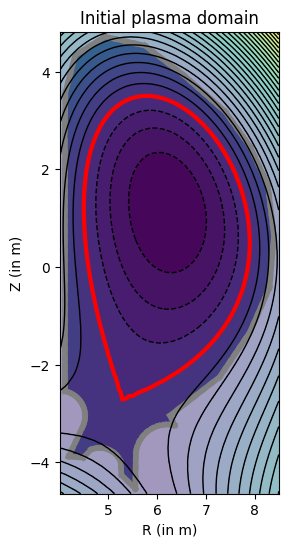

In [6]:
# DEFINE INITIAL PLASMA BOUNDARY
"""
# PLASMA BOUNDARY PARAMETRISED USING LINEAR SOLUTION 0-LEVEL CONTOUR
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,   
                                           GEOMETRY = 'LINEAR', # PREDEFINED MODEL
                                           R0 = 6.0,            # MEAN RADIUS          
                                           epsilon = 0.38,      # INVERSE ASPECT RATIO
                                           kappa = 1.8,         # ELONGATION
                                           delta = 0.34)        # TRIANGULARITY
"""

"""
# PLASMA BOUNDARY PARAMETRISED USING ZHENG SOLUTION 0-LEVEL CONTOUR
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,
                                           GEOMETRY = 'ZHENG', # PREDEFINED MODEL
                                           R0 = 6.0,           # MEAN RADIUS          
                                           epsilon = 0.32,     # INVERSE ASPECT RATIO
                                           kappa = 1.7,        # ELONGATION
                                           delta = 0.33)       # TRIANGULARITY
"""

"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])            # POINT ON TOP
"""

X_SADDLE = np.array([5.3, -2.7])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.5])

# PLASMA BOUNDARY PARAMETRISED F4E HAMILTONIAN 0-LEVEL CONTOUR
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,
                                           GEOMETRY = 'F4E',
                                           Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                           Xright = X_RIGHT,    # POINT ON RIGHT
                                           Xleft = X_LEFT,      # POINT ON LEFT
                                           Xtop = X_TOP)        # POINT ON TOP

"""
def PHI0(X):
    return
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,
                                           GEOMETRY = 'OTHER',
                                           PHI0 = PHI0)
"""

Problem.initialPHI.Plot()

In [7]:
Problem.InitialiseMESH()

PREPROCESS MESH AND INITIALISE MESH ITEMS...
     -> INITIALISE SIMULATION PARAMETERS...Done!
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.017036638942055492 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.1968502217357368 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·20.320017751211036
     Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
Done!


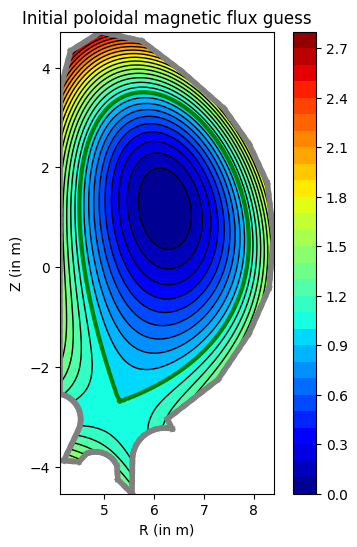

In [8]:
# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX
"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                                  

"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                             
                                 
"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'ZHENG',  # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE
"""

"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'NONLINEAR',  # PREDEFINED MODEL
                                  NOISE = True,             # WHITE NOISE 
                                  R0 = 6.0,                 # MEAN RADIUS
                                  A = 2.0)                  # NOISE AMPLITUDE         
"""   

"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])            # POINT ON TOP
"""

X_SADDLE = np.array([5.3, -2.7])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.5])

X0 = list()
X0.append(np.array([6.0,0.0],dtype=float))
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'F4E',
                                  NORMALISE = True,
                                  Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                  Xright = X_RIGHT,    # POINT ON RIGHT
                                  Xleft = X_LEFT,      # POINT ON LEFT
                                  Xtop = X_TOP,        # POINT ON TOP
                                  X0 = X0)     

"""
def PSI0(X):
    return
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'OTHER',
                                  PSI0 = PSI0)
"""

Problem.initialPSI.Plot()

In [9]:
Problem.InitialisePSI()

     -> INITIALISE PSI ARRAYS...Done!
     -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!


In [10]:
### DEFINE PLASMA CURRENT MODEL

# LINEAR MODEL
"""
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'LINEAR',  # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS          
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY
"""

"""
# ZHENG MODEL
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'ZHENG',   # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY
"""

"""
# NONLINEAR MODEL
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'NONLINEAR', # PREDEFINED MODEL
                                     R0 = 6.0)            # MEAN RADIUS
"""


# COMPUTE PRESSURE PROFILE FACTOR
R0 = 6.0        # MEAN RADIUS
kappa = 1.7     # ELONGATION
B0 = 9.0        # MAGNETIC FIELD MAGNITUDE ON MAGNETIC AXIS
q0 = 0.7        # TOKAMAK SAFETY FACTOR

P0=B0*((kappa**2)+1)/(Problem.mu0*(R0**2)*q0*kappa)

"""
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'JARDIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     np = 2.0,          # 
                                     G0 = -34.4,        # TOROIDAL FUNCTION VALUE ON MAGNETIC AXIS
                                     ng = 2.0,          #
                                     Tcurrent = -15e6)  # TOTAL PLASMA CURRENT
"""

"""
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'PCONSTRAIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     alpha_m = 1,       # 
                                     alpha_n = 2,       #
                                     Tcurrent = 15e6)  # TOTAL PLASMA CURRENT
"""

Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'APEC',
                                     Ii = 0.81,         # PLASMA INTERNAL INDUCTANCE
                                     Betap = 0.75,      # POLOIDAL BETA
                                     R0 = 6.0,          # MEAN RADIUS
                                     Tcurrent = 15e6)   # TOTAL PLASMA CURRENT


"""
# USER DEFINED MODEL
def Jphi(X,PSI):
    return 6*X[0]
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'OTHER',
                                     Jphi = Jphi,
                                     PSIdependent = False)
"""

"\n# USER DEFINED MODEL\ndef Jphi(X,PSI):\n    return 6*X[0]\nProblem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,\n                                     MODEL = 'OTHER',\n                                     Jphi = Jphi,\n                                     PSIdependent = False)\n"

In [11]:
Problem.IntegratePlasmaDomain(Problem.PlasmaCurrent.Jphi)

14999999.999999939

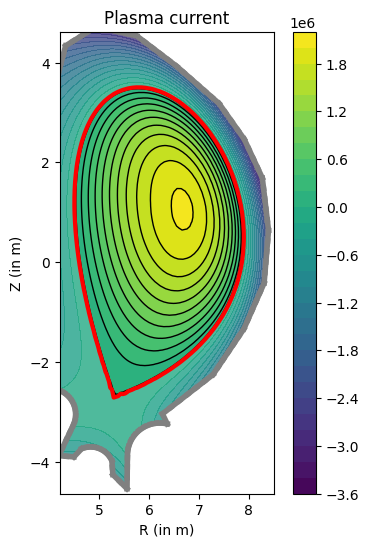

In [12]:
Problem.PlasmaCurrent.Plot()

PREPARE OUTPUT DIRECTORY...Done!
INITIALISE SIMULATION ARRAYS ...
     -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
     -> ASSIGN INITIAL BOUNDARY VALUES...Done!
Done!


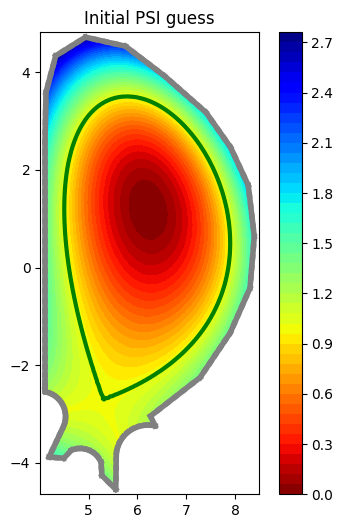

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Total current =  14999999.999999939
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.40756717, 0.80610894]), -10.60067669608695, 1097)]
Xpoint =  [(array([ 4.97304791, -3.09297581]), 0.625989635100477, 185)]
LOCAL EXTREMUM AT  [6.40756717 0.80610894]  (ELEMENT  1097 ) WITH VALUE PSI_0 =  -10.60067669608695
SADDLE POINT AT  [ 4.97304791 -3.09297581]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.625989635100477


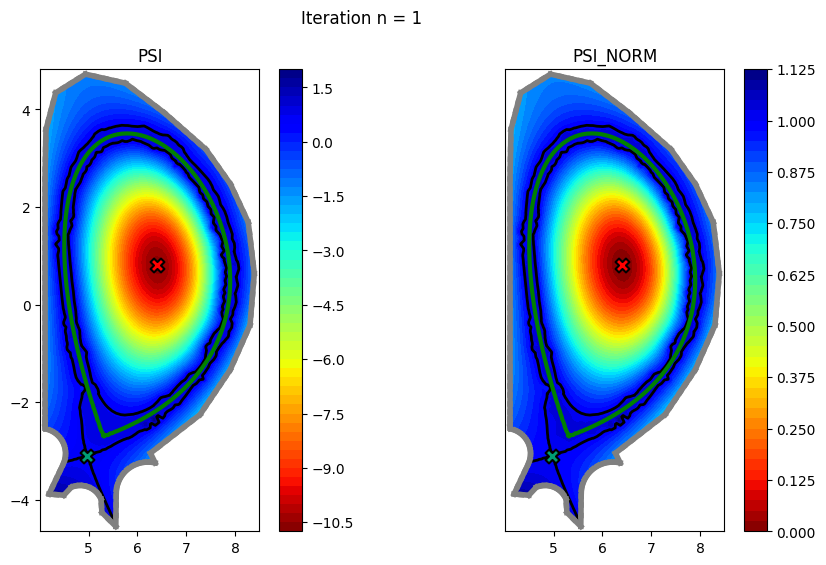

Internal iteration =  1 , PSI_NORM residu =  0.48611690760764464
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Total current =  14999999.999999998
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.44353695, 0.82840867]), -12.800281608335562, 1097)]
Xpoint =  [(array([ 5.08499419, -3.10308859]), 0.625956270928612, 300)]
LOCAL EXTREMUM AT  [6.44353695 0.82840867]  (ELEMENT  1097 ) WITH VALUE PSI_0 =  -12.800281608335562
SADDLE POINT AT  [ 5.08499419 -3.10308859]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.625956270928612


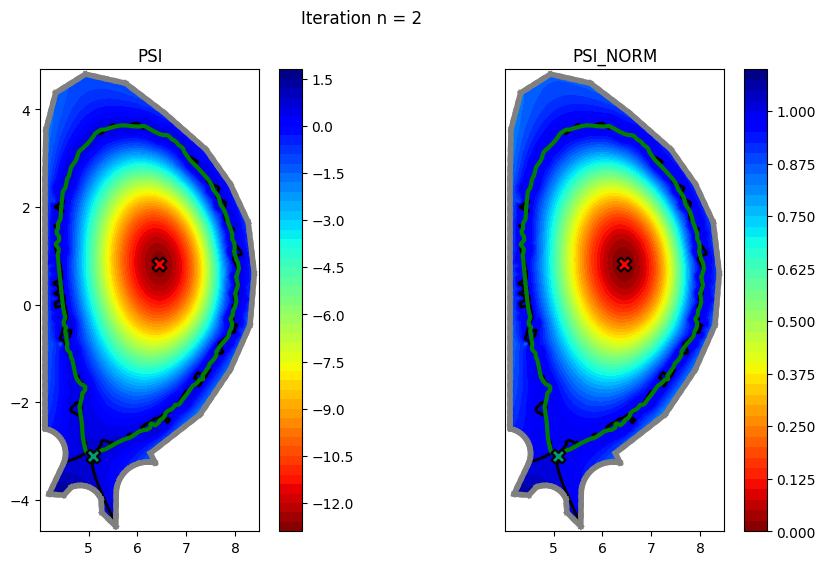

Internal iteration =  2 , PSI_NORM residu =  0.07765843995150891
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Total current =  14999999.999999959
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.47832018, 0.70470356]), -14.387526957816146, 1099)]
Xpoint =  [(array([ 5.08632429, -3.10316387]), 0.6260075830930396, 300)]
LOCAL EXTREMUM AT  [6.47832018 0.70470356]  (ELEMENT  1099 ) WITH VALUE PSI_0 =  -14.387526957816146
SADDLE POINT AT  [ 5.08632429 -3.10316387]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6260075830930396


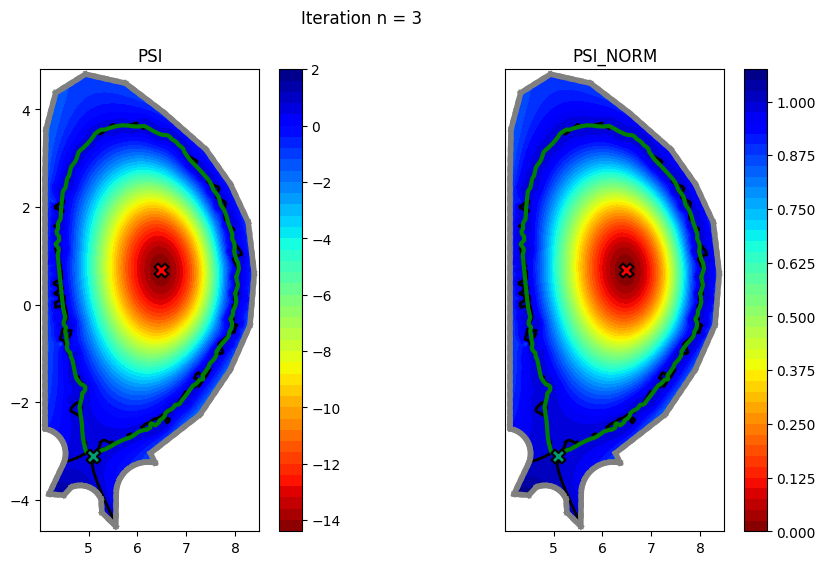

Internal iteration =  3 , PSI_NORM residu =  0.03205340918554939
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Total current =  14999999.999999966
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.50159936, 0.71372699]), -12.647663682965895, 1099)]
Xpoint =  [(array([ 5.08400083, -3.10288074]), 0.6258795681851529, 300)]
LOCAL EXTREMUM AT  [6.50159936 0.71372699]  (ELEMENT  1099 ) WITH VALUE PSI_0 =  -12.647663682965895
SADDLE POINT AT  [ 5.08400083 -3.10288074]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6258795681851529


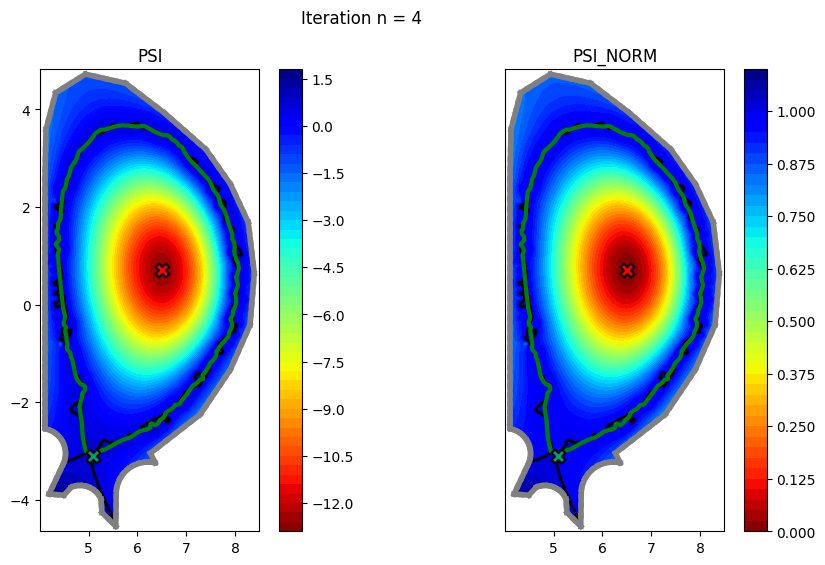

Internal iteration =  4 , PSI_NORM residu =  0.016996381043895073
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Total current =  14999999.999999972
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51194397, 0.6623684 ]), -13.006682613930025, 1560)]
Xpoint =  [(array([ 5.08409567, -3.10278137]), 0.625749702623448, 300)]
LOCAL EXTREMUM AT  [6.51194397 0.6623684 ]  (ELEMENT  1560 ) WITH VALUE PSI_0 =  -13.006682613930025
SADDLE POINT AT  [ 5.08409567 -3.10278137]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.625749702623448


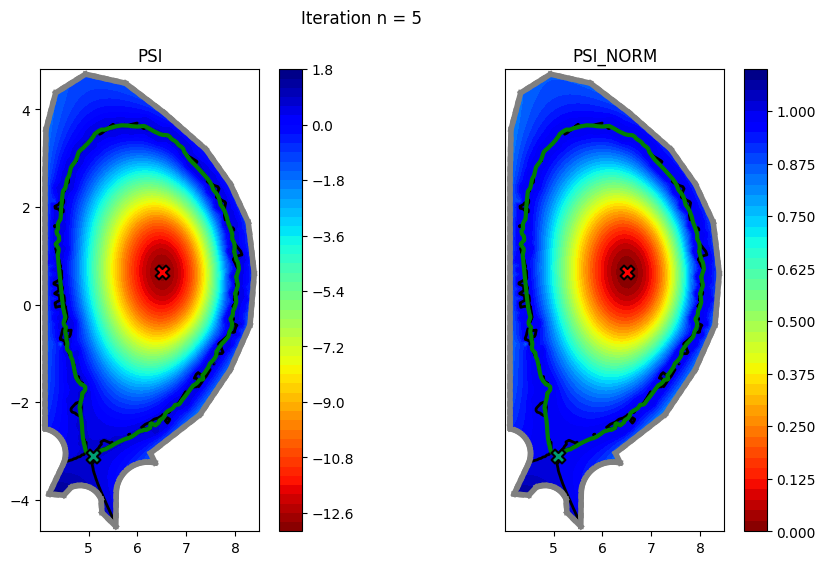

Internal iteration =  5 , PSI_NORM residu =  0.011490747830127204
 
OUTER ITERATION = 1 , INNER ITERATION = 6
     Total current =  15000000.000000078
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51957092, 0.66556294]), -12.766288222863452, 1099)]
Xpoint =  [(array([ 5.0839959 , -3.10265668]), 0.6256032569105765, 300)]
LOCAL EXTREMUM AT  [6.51957092 0.66556294]  (ELEMENT  1099 ) WITH VALUE PSI_0 =  -12.766288222863452
SADDLE POINT AT  [ 5.0839959  -3.10265668]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6256032569105765


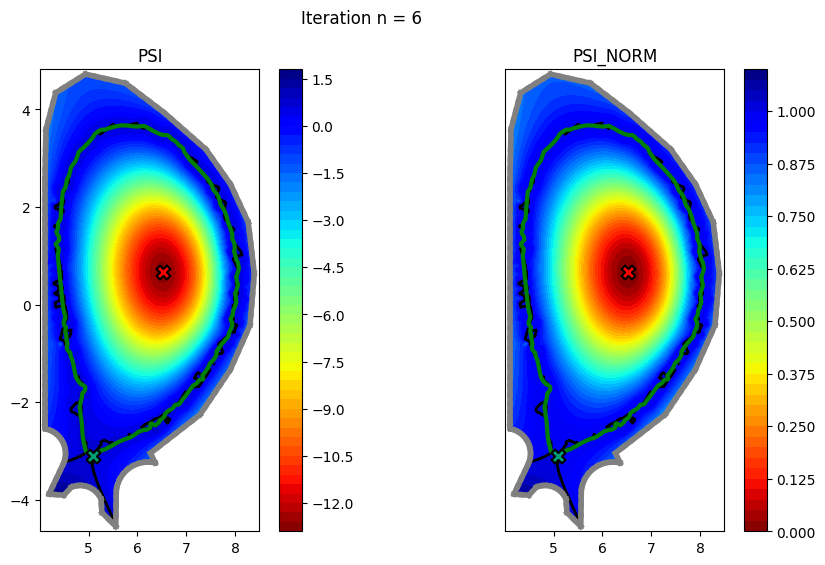

Internal iteration =  6 , PSI_NORM residu =  0.003794837509691534
 
OUTER ITERATION = 1 , INNER ITERATION = 7
     Total current =  15000000.000000073
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52320925, 0.64224864]), -12.858367548295517, 1560)]
Xpoint =  [(array([ 5.08405154, -3.10253892]), 0.6254510439065868, 300)]
LOCAL EXTREMUM AT  [6.52320925 0.64224864]  (ELEMENT  1560 ) WITH VALUE PSI_0 =  -12.858367548295517
SADDLE POINT AT  [ 5.08405154 -3.10253892]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6254510439065868


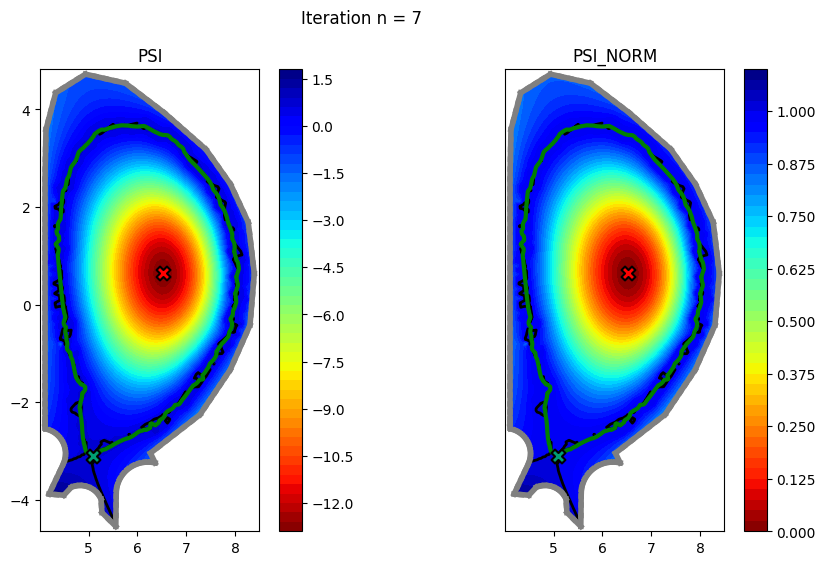

Internal iteration =  7 , PSI_NORM residu =  0.0046759960168535715
 
OUTER ITERATION = 1 , INNER ITERATION = 8
     Total current =  15000000.000000058
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52521871, 0.64343191]), -12.808251307887442, 1560)]
Xpoint =  [(array([ 5.08415088, -3.1024255 ]), 0.6252963413244355, 300)]
LOCAL EXTREMUM AT  [6.52521871 0.64343191]  (ELEMENT  1560 ) WITH VALUE PSI_0 =  -12.808251307887442
SADDLE POINT AT  [ 5.08415088 -3.1024255 ]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6252963413244355


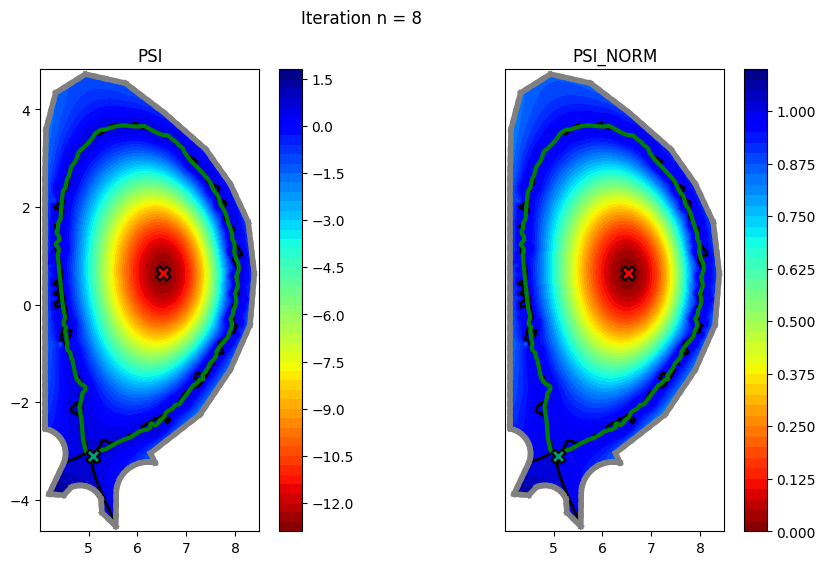

Internal iteration =  8 , PSI_NORM residu =  0.0009484567520171399
 
OUTER ITERATION = 1 , INNER ITERATION = 9
     Total current =  15000000.0
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52660666, 0.63264921]), -12.83435592021239, 1560)]
Xpoint =  [(array([ 5.08423984, -3.10231003]), 0.6251380748010503, 300)]
LOCAL EXTREMUM AT  [6.52660666 0.63264921]  (ELEMENT  1560 ) WITH VALUE PSI_0 =  -12.83435592021239
SADDLE POINT AT  [ 5.08423984 -3.10231003]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6251380748010503


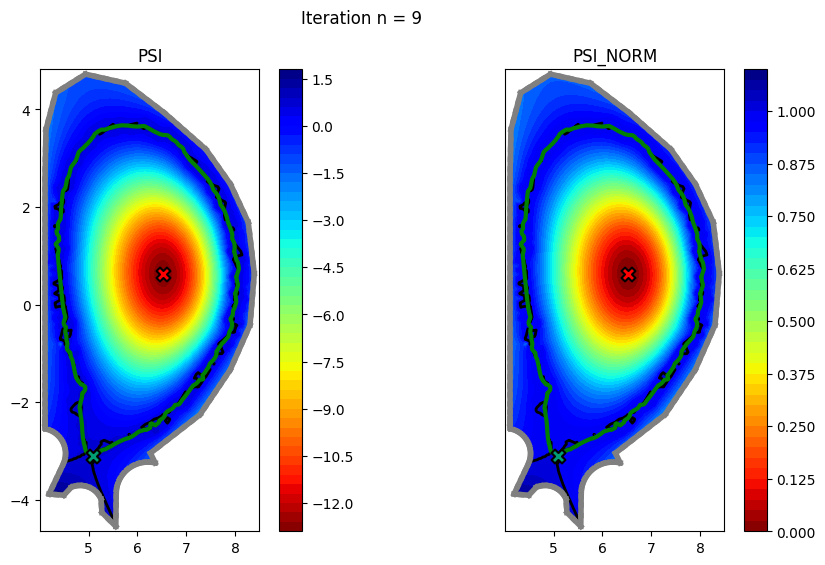

Internal iteration =  9 , PSI_NORM residu =  0.002043415947584159
 
OUTER ITERATION = 1 , INNER ITERATION = 10
     Total current =  14999999.999999924
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.527094  , 0.63311714]), -12.822447994697702, 1560)]
Xpoint =  [(array([ 5.08437862, -3.10220312]), 0.6249800232667285, 300)]
LOCAL EXTREMUM AT  [6.527094   0.63311714]  (ELEMENT  1560 ) WITH VALUE PSI_0 =  -12.822447994697702
SADDLE POINT AT  [ 5.08437862 -3.10220312]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6249800232667285


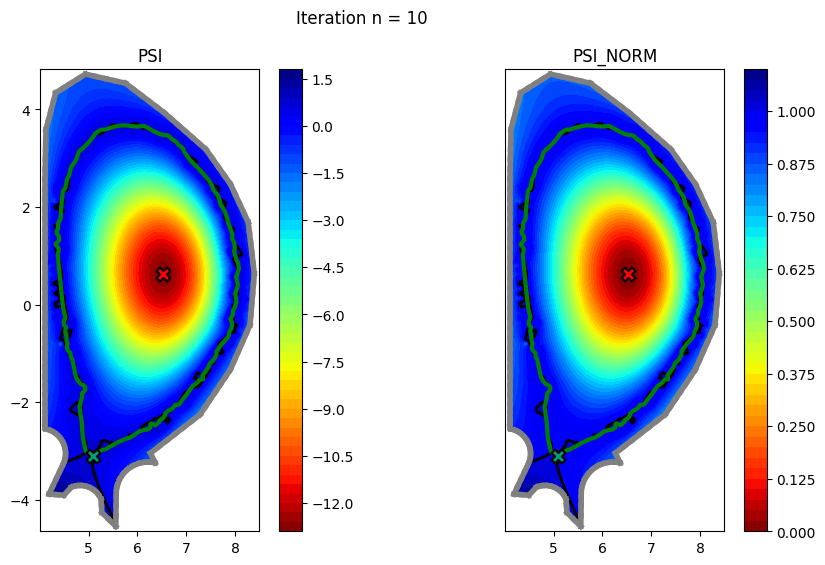

Internal iteration =  10 , PSI_NORM residu =  0.0002523184397326593
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  1 , PSI_B residu =  0.7095284274537169
 
OUTER ITERATION = 2 , INNER ITERATION = 1
     Total current =  15000000.0000001
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52818012, 0.62763845]), -12.838530495902658, 1560), (array([ 5.16768514, -3.01777405]), 0.6255918841731474, 1638)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.52818012 0.62763845]  (ELEMENT  1560 ) WITH VALUE PSI_0 =  -12.838530495902658
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.08437862 -3.10220312]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6249800232667285


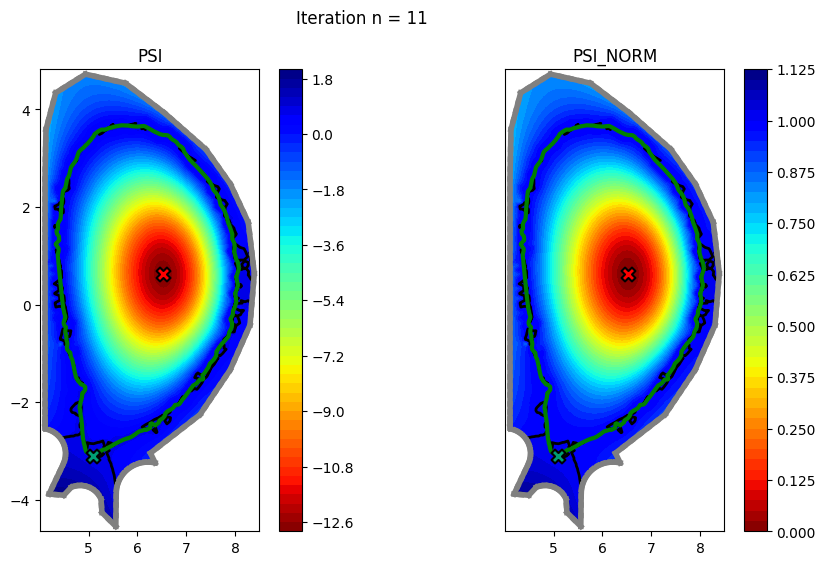

Internal iteration =  1 , PSI_NORM residu =  0.033057669745105815
 
OUTER ITERATION = 2 , INNER ITERATION = 2
     Total current =  14999999.999999996
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52829181, 0.62783352]), -12.83540851487549, 1560), (array([ 5.16768654, -3.01777552]), 0.6255918428891003, 1638)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.52829181 0.62783352]  (ELEMENT  1560 ) WITH VALUE PSI_0 =  -12.83540851487549
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.08437862 -3.10220312]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6249800232667285


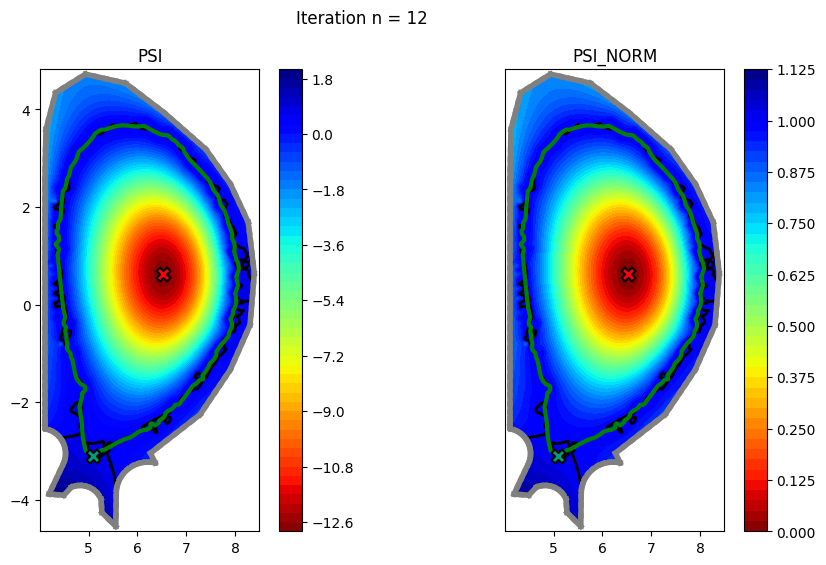

Internal iteration =  2 , PSI_NORM residu =  7.174043070894785e-05
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  2 , PSI_B residu =  0.009142068027127734
 
OUTER ITERATION = 3 , INNER ITERATION = 1
     Total current =  15000000.00000008
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52876902, 0.62511559]), -12.834103478953688, 1461), (array([ 5.16794642, -3.01763996]), 0.6255990881523577, 1638)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.52876902 0.62511559]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.834103478953688
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.08437862 -3.10220312]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6249800232667285


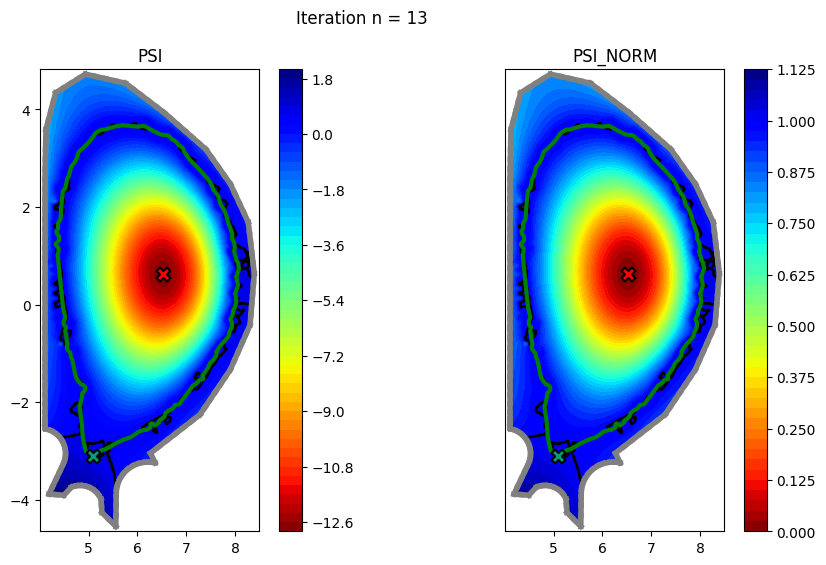

Internal iteration =  1 , PSI_NORM residu =  0.0006866100586371724
 
OUTER ITERATION = 3 , INNER ITERATION = 2
     Total current =  14999999.999999974
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52879272, 0.62520031]), -12.833261120128837, 1461), (array([ 5.16794664, -3.01764017]), 0.6255990818892889, 1638)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.52879272 0.62520031]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.833261120128837
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.08437862 -3.10220312]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6249800232667285


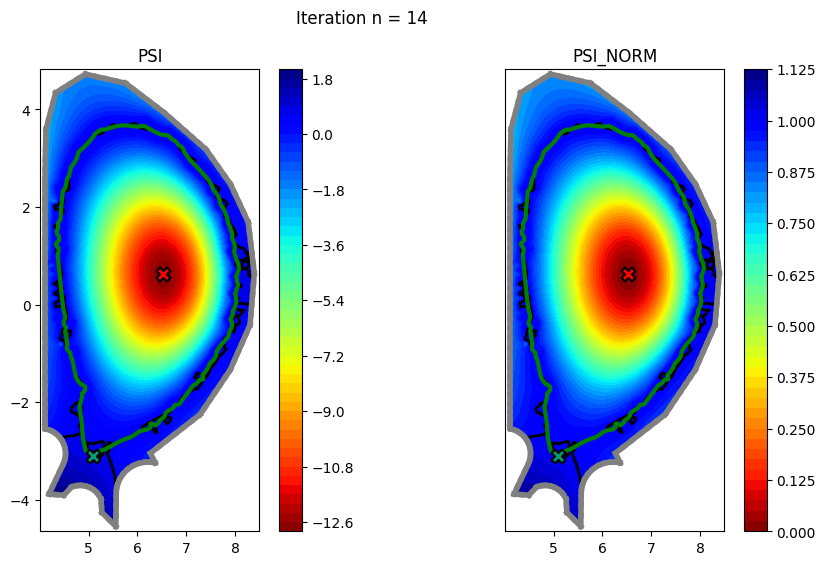

Internal iteration =  2 , PSI_NORM residu =  2.2627894779802886e-05
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  3 , PSI_B residu =  0.003585544749723472
 
OUTER ITERATION = 4 , INNER ITERATION = 1
     Total current =  14999999.999999968
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.528966  , 0.62389144]), -12.833774981557335, 1461), (array([ 5.16804906, -3.01759124]), 0.6256020422997737, 1638)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.528966   0.62389144]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.833774981557335
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.08437862 -3.10220312]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6249800232667285


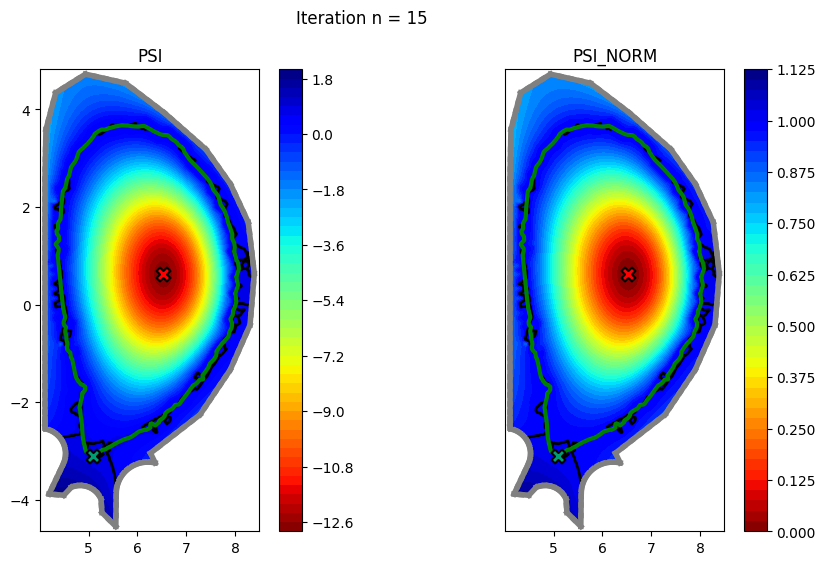

Internal iteration =  1 , PSI_NORM residu =  0.000299064775636928
 
OUTER ITERATION = 4 , INNER ITERATION = 2
     Total current =  15000000.00000004
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52897031, 0.62392928]), -12.83354127062848, 1461), (array([ 5.16804905, -3.01759122]), 0.6256020428764111, 1638)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.52897031 0.62392928]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.83354127062848
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.08437862 -3.10220312]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6249800232667285


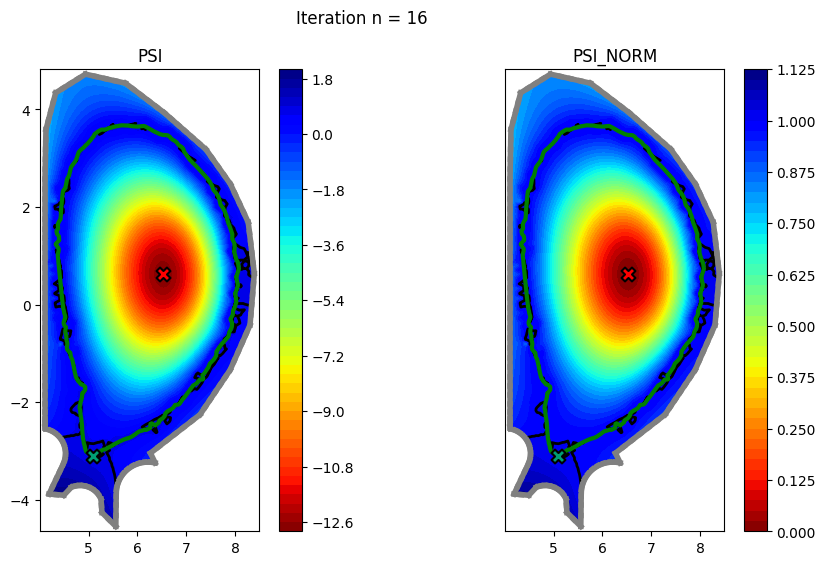

Internal iteration =  2 , PSI_NORM residu =  8.144390577711304e-06
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  4 , PSI_B residu =  0.0016308865778691182
 
OUTER ITERATION = 5 , INNER ITERATION = 1
     Total current =  14999999.999999965
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.5290314, 0.623308 ]), -12.833769896430384, 1461), (array([ 5.16809542, -3.01756902]), 0.6256033872428132, 1638)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.5290314 0.623308 ]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.833769896430384
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.08437862 -3.10220312]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6249800232667285


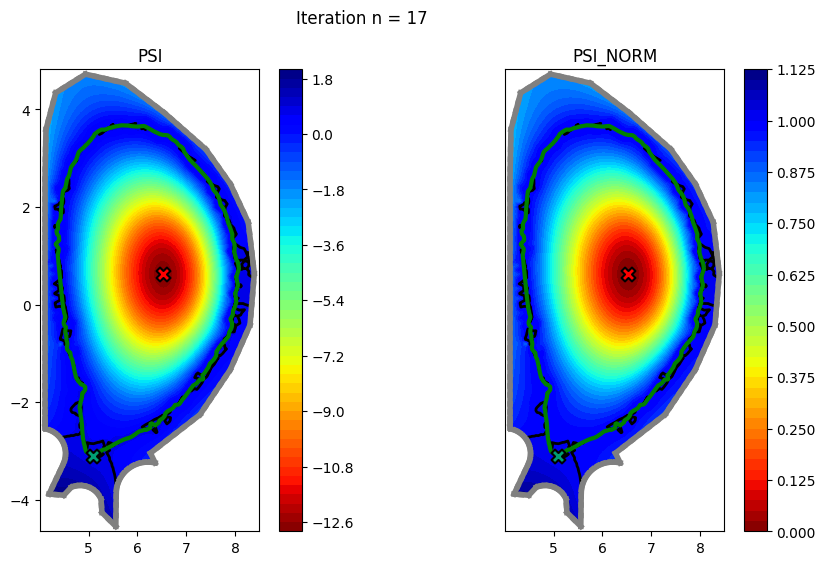

Internal iteration =  1 , PSI_NORM residu =  0.00013850670005540123
 
OUTER ITERATION = 5 , INNER ITERATION = 2
     Total current =  15000000.000000073
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52903185, 0.6233252 ]), -12.833704013794001, 1461), (array([ 5.16809538, -3.01756898]), 0.625603388487143, 1638)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.52903185 0.6233252 ]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.833704013794001
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.08437862 -3.10220312]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6249800232667285


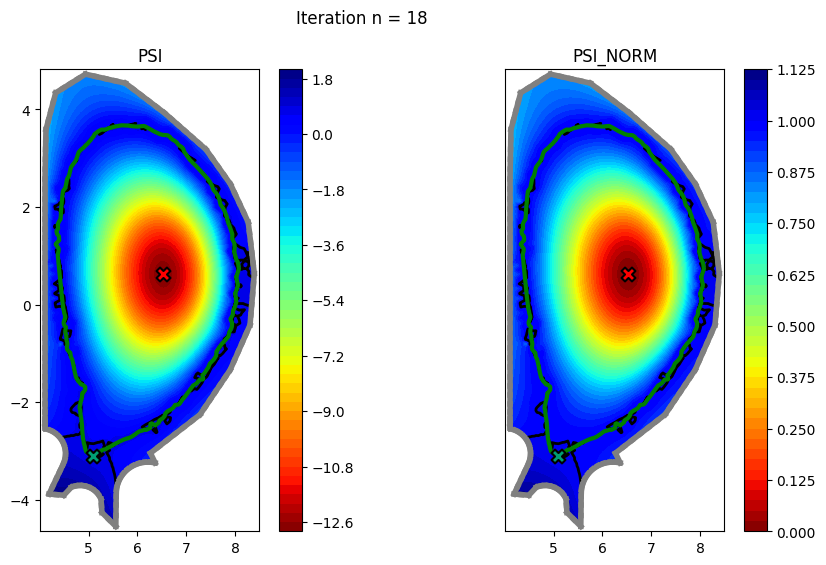

Internal iteration =  2 , PSI_NORM residu =  3.3059670156134124e-06
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  5 , PSI_B residu =  0.0007586116629265835
 
SOLUTION CONVERGED


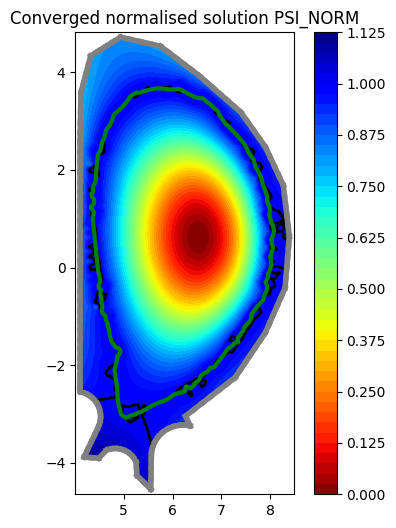

In [13]:
## NAME SIMULATION CASE 
CASE = 'TS-FREE-APEC-ITFW'

## COMPUTE PLASMA EQUILIBRIUM
Problem.EQUILI(CASE)

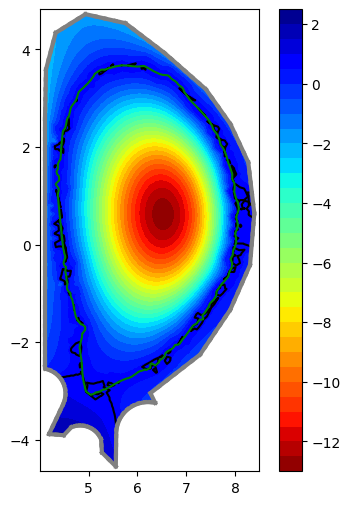

In [14]:
Problem.PlotPSI()

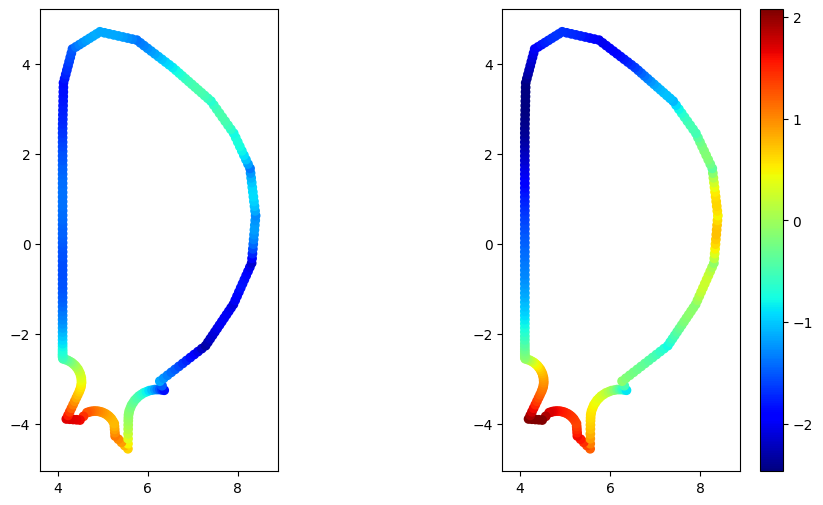

In [15]:
self = Problem

cmap = plt.get_cmap('jet')

norm = plt.Normalize(np.min([self.PSI_B_sim[0].min(),self.PSI_B_sim[1].min()]),np.max([self.PSI_B_sim[0].max(),self.PSI_B_sim[1].max()]))

fig, axs = plt.subplots(1, 2, figsize=(11,6))
axs[0].set_aspect('equal')
axs[0].set_ylim(self.Zmin-0.5,self.Zmax+0.5)
axs[0].set_xlim(self.Rmin-0.5,self.Rmax+0.5)

linecolors0 = cmap(norm(self.PSI_B_sim[0]))
axs[0].scatter(self.X[self.BoundaryNodes,0],self.X[self.BoundaryNodes,1],color = linecolors0)

axs[1].set_aspect('equal')
axs[1].set_ylim(self.Zmin-0.5,self.Zmax+0.5)
axs[1].set_xlim(self.Rmin-0.5,self.Rmax+0.5)

linecolors1 = cmap(norm(self.PSI_B_sim[1]))
axs[1].scatter(self.X[self.BoundaryNodes,0],self.X[self.BoundaryNodes,1],color = linecolors1)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=axs[1])


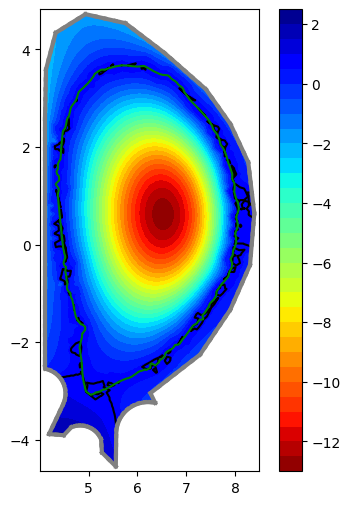

In [16]:
Problem.PlotPSI()

In [17]:
self = Problem

np.linalg.norm(np.array(self.PSI_B_sim[0])-np.array(self.PSI_B_sim[1]))/np.linalg.norm(np.array(self.PSI_B_sim[1]))

0.7095284274537169

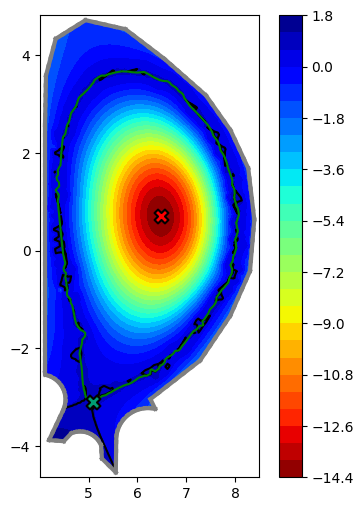

In [18]:
PlasmaIt_sim = np.zeros(len(self.PSIIt_sim), dtype=int)
plasupit = 0
for it in range(len(self.PSIIt_sim)):
    PlasmaIt_sim[it] = plasupit - 1 if it else 0  # First element is 0, others follow pbit-1
    
    if plasupit < len(self.PlasmaUpdateIt_sim) and it == self.PlasmaUpdateIt_sim[plasupit]:
        plasupit += 1
        if plasupit == len(self.PlasmaUpdateIt_sim):  # If last update point, assign remaining values
            PlasmaIt_sim[it+1:] = plasupit - 1
            break 

it = 3       

PSI = self.PSI_sim[it][:,0]
Xcrit = self.PSIcrit_sim[it-1]
PlasmaLS = self.PlasmaLS_sim[PlasmaIt_sim[it]]

fig, ax = plt.subplots(1, 1, figsize=(5,6))
ax.set_aspect('equal')
ax.set_xlim(self.Rmin-self.dzoom,self.Rmax+self.dzoom)
ax.set_ylim(self.Zmin-self.dzoom,self.Zmax+self.dzoom)
contourf = ax.tricontourf(self.X[:,0],self.X[:,1], PSI, levels=30, cmap = self.plasmacmap)
contour1 = ax.tricontour(self.X[:,0],self.X[:,1], PSI, levels=[Xcrit[1,3]], colors = 'black')
contour2 = ax.tricontour(self.X[:,0],self.X[:,1], PlasmaLS, levels=[0], colors = self.plasmabouncolor)

# MAGNETIC AXIS
ax.scatter(Xcrit[0,0],Xcrit[0,1],marker = 'X',facecolor=self.magneticaxiscolor, edgecolor='k', s = 100, linewidths = 1.5,zorder=5)
# SADDLE POINT
ax.scatter(Xcrit[1,0],Xcrit[1,1],marker = 'X',facecolor=self.saddlepointcolor, edgecolor='k', s = 100, linewidths = 1.5,zorder=5)

# Mask solution outside computational domain's boundary 
compboundary = np.zeros([len(self.BoundaryVertices)+1,2])
compboundary[:-1,:] = self.X[self.BoundaryVertices,:]
# Close path
compboundary[-1,:] = compboundary[0,:]
clip_path = Path(compboundary)
patch = PathPatch(clip_path, transform=ax.transData)
for cont in [contourf,contour1,contour2]:
    for coll in cont.collections:
        coll.set_clip_path(patch)
# Plot computational domain's boundary
for iboun in range(self.Nbound):
    ax.plot(self.X[self.Tbound[iboun,:2],0],self.X[self.Tbound[iboun,:2],1],linewidth = 3, color = 'grey')
        
plt.colorbar(contourf, ax=ax)
plt.show()

In [19]:
Xcrit[1,3]

0.6260075830930396

In [20]:
# SMOOTH FIELD VALUES AROUND INTERFACE 
from scipy.interpolate import SmoothBivariateSpline

spline = SmoothBivariateSpline(self.X[:, 0], self.X[:, 1], PSI, kx=5, ky=5)

PSI_smooth = PSI.copy()

for ielem in self.PlasmaBoundElems:
    ELEM = self.Elements[ielem]
    PSI_smooth[ELEM.Te] = spline(ELEM.Xe[:, 0], ELEM.Xe[:, 1], grid=False)


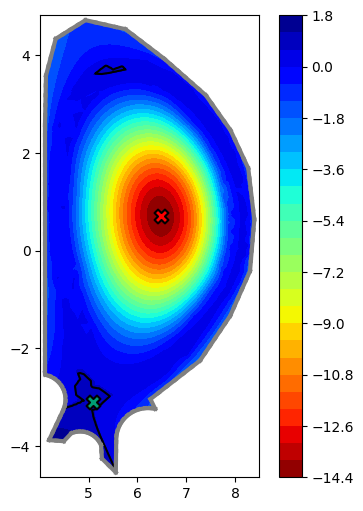

In [21]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(5,6))
ax.set_aspect('equal')
ax.set_xlim(self.Rmin-self.dzoom,self.Rmax+self.dzoom)
ax.set_ylim(self.Zmin-self.dzoom,self.Zmax+self.dzoom)

contourf = ax.tricontourf(self.X[:, 0], self.X[:, 1], PSI_smooth, levels=30, cmap = self.plasmacmap)
contour1 = ax.tricontour(self.X[:, 0], self.X[:, 1], PSI_smooth, levels=[Xcrit[1,3]], colors = 'black')
#contour2 = ax.tricontour(self.X[:,0],self.X[:,1], PlasmaLS, levels=[0], colors = self.plasmabouncolor)

# MAGNETIC AXIS
ax.scatter(Xcrit[0,0],Xcrit[0,1],marker = 'X',facecolor=self.magneticaxiscolor, edgecolor='k', s = 100, linewidths = 1.5,zorder=5)
# SADDLE POINT
ax.scatter(Xcrit[1,0],Xcrit[1,1],marker = 'X',facecolor=self.saddlepointcolor, edgecolor='k', s = 100, linewidths = 1.5,zorder=5)

# Mask solution outside computational domain's boundary 
compboundary = np.zeros([len(self.BoundaryVertices)+1,2])
compboundary[:-1,:] = self.X[self.BoundaryVertices,:]
# Close path
compboundary[-1,:] = compboundary[0,:]
clip_path = Path(compboundary)
patch = PathPatch(clip_path, transform=ax.transData)
for cont in [contourf,contour1,contour2]:
    for coll in cont.collections:
        coll.set_clip_path(patch)     
        
# Plot computational domain's boundary
for iboun in range(self.Nbound):
    ax.plot(self.X[self.Tbound[iboun,:2],0],self.X[self.Tbound[iboun,:2],1],linewidth = 3, color = 'grey')
        
plt.colorbar(contourf, ax=ax)
plt.show()

In [22]:
# COMPUTE CRITICAL VALUES
X0 = list()
X0.append(np.array([self.EXTR_R0,self.EXTR_Z0],dtype=float))
#X0.append(np.array([self.SADD_R0,self.SADD_Z0],dtype=float))
X0.append(np.array([5,-3],dtype=float))

Opoint, Xpoint = self.FindCritical(PSI_smooth,X0)

In [23]:
print(Opoint,Xpoint)

psiaxis = Opoint[0][1]
if not Xpoint:
    psiboun = Xcrit[1,3]
    
PSI_smooth_NORM = (PSI_smooth-psiaxis)/(psiboun-psiaxis)

[(array([6.47832018, 0.70470356]), -14.387526957829856, 1099)] [(array([ 5.01749859, -2.98622242]), 0.7169882576435171, 300)]


NameError: name 'psiboun' is not defined

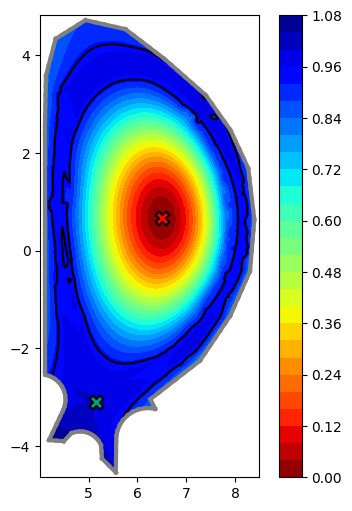

In [ ]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(5,6))
ax.set_aspect('equal')
ax.set_xlim(self.Rmin-self.dzoom,self.Rmax+self.dzoom)
ax.set_ylim(self.Zmin-self.dzoom,self.Zmax+self.dzoom)

#contourf = ax.tricontourf(self.X[:, 0], self.X[:, 1], PSI_smooth, levels=30, cmap = self.plasmacmap)
#contour1 = ax.tricontour(self.X[:, 0], self.X[:, 1], PSI_smooth, levels=[Xcrit[1,3]-0.75], colors = 'black')
#contour2 = ax.tricontour(self.X[:,0],self.X[:,1], PlasmaLS, levels=[0], colors = self.plasmabouncolor)

contourf = ax.tricontourf(self.X[:, 0], self.X[:, 1], PSI_smooth_NORM, levels=30, cmap = self.plasmacmap)
contour1 = ax.tricontour(self.X[:, 0], self.X[:, 1], PSI_smooth_NORM, levels=[0.93], colors = 'black')

# MAGNETIC AXIS
ax.scatter(Xcrit[0,0],Xcrit[0,1],marker = 'X',facecolor=self.magneticaxiscolor, edgecolor='k', s = 100, linewidths = 1.5,zorder=5)
# SADDLE POINT
ax.scatter(Xcrit[1,0],Xcrit[1,1],marker = 'X',facecolor=self.saddlepointcolor, edgecolor='k', s = 100, linewidths = 1.5,zorder=5)

# Mask solution outside computational domain's boundary 
compboundary = np.zeros([len(self.BoundaryVertices)+1,2])
compboundary[:-1,:] = self.X[self.BoundaryVertices,:]
# Close path
compboundary[-1,:] = compboundary[0,:]
clip_path = Path(compboundary)
patch = PathPatch(clip_path, transform=ax.transData)
for cont in [contourf,contour1,contour2]:
    for coll in cont.collections:
        coll.set_clip_path(patch)     
        
# Plot computational domain's boundary
for iboun in range(self.Nbound):
    ax.plot(self.X[self.Tbound[iboun,:2],0],self.X[self.Tbound[iboun,:2],1],linewidth = 3, color = 'grey')
        
plt.colorbar(contourf, ax=ax)
plt.show()